In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from IPython.display import display
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

import gc

gc.collect()


pd.set_option('display.float_format',lambda x:'%.3f' % x)
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

In [13]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.066,7.780,12.954,9.429,11.433,-2.381,5.849,18.267,2.134,...,-2.156,11.850,-1.430,2.451,13.711,2.467,4.365,10.720,15.472,-8.720
1,test_1,8.530,1.254,11.305,5.186,9.197,-4.012,6.020,18.632,-4.413,...,10.617,8.835,0.940,10.128,15.576,0.477,-1.485,9.871,19.129,-20.976
2,test_2,5.483,-10.358,10.141,7.048,10.263,9.805,4.895,20.254,1.523,...,-0.748,10.993,1.980,2.180,12.981,2.128,-7.109,7.062,19.896,-23.179
3,test_3,8.537,-1.322,12.022,6.575,8.846,3.174,4.940,20.566,3.376,...,9.570,9.077,1.658,3.581,15.187,3.166,3.957,9.229,13.017,-4.211
4,test_4,11.706,-0.133,14.130,7.751,9.104,-8.585,6.859,10.605,2.989,...,4.226,9.172,1.284,3.378,19.554,-0.286,-5.161,7.288,13.926,-9.185


In [14]:
feature_names = [x for x in train.columns if x not in ['ID_code','target']]

In [15]:
y_train = train['target']
train.drop(['target'],axis=1,inplace=True)
train.drop(['ID_code'],axis=1,inplace=True)

In [ ]:
train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.925,-6.786,11.908,5.093,11.461,-9.283,5.119,18.627,-4.920,5.747,...,4.435,3.964,3.136,1.691,18.523,-2.398,7.878,8.563,12.780,-1.091
1,11.501,-4.147,13.859,5.389,12.362,7.043,5.621,16.534,3.147,8.085,...,7.642,7.721,2.584,10.952,15.431,2.034,8.127,8.789,18.356,1.952
2,8.609,-2.746,12.081,7.893,10.582,-9.084,6.943,14.616,-4.919,5.952,...,2.906,9.790,1.670,1.686,21.604,3.142,-6.521,8.268,14.722,0.397
3,11.060,-2.152,8.952,7.196,12.585,-1.836,5.843,14.925,-5.861,8.245,...,4.467,4.743,0.718,1.421,23.035,-1.271,-2.928,10.292,17.970,-9.000
4,9.837,-1.483,12.875,6.638,12.277,2.449,5.941,19.251,6.265,7.678,...,-1.490,9.521,-0.151,9.194,13.288,-1.512,3.927,9.503,17.997,-8.810


In [ ]:
train.isnull().sum()

var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 200, dtype: int64

0    179902
1     20098
Name: target, dtype: int64


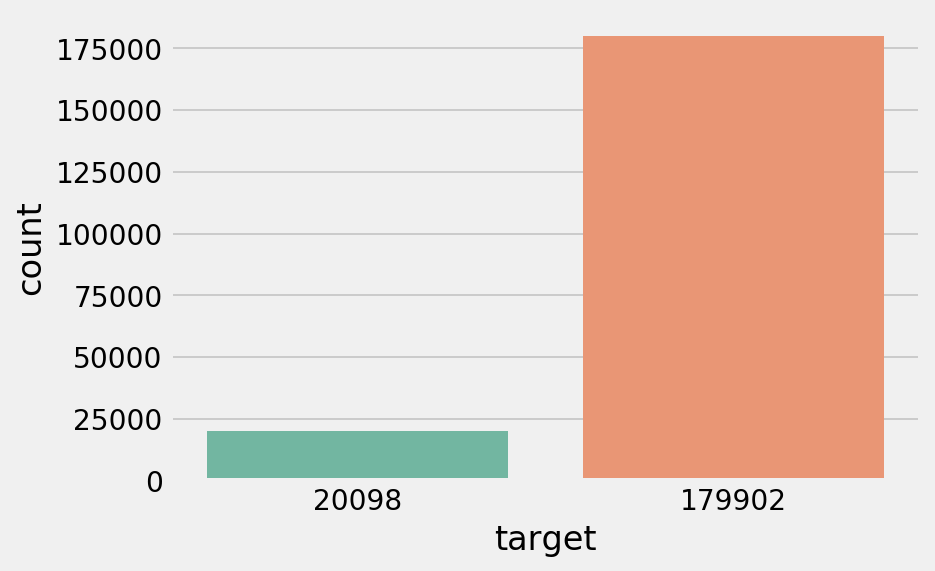

In [ ]:
print(y_train.value_counts())
sns.countplot(x=y_train,data=y_train.value_counts(),palette='Set2')
plt.show()

In [ ]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
data_num = train[numerical_features]
data_cat = train[categorical_features]

Numerical features : 200
Categorical features : 0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier()
gbrt.fit(train,y_train)
y_pred = gbrt.predict(test[feature_names])
y_pred_proba = gbrt.predict_proba(test[feature_names])

gbrt_submission = pd.DataFrame()
gbrt_submission['ID_code'] = test['ID_code']
gbrt_submission['target'] = y_pred_proba[:,1]
gbrt_submission.to_csv('./results/gbrt_sub_v2.csv', index=False)

In [ ]:
import xgboost as xgb

xg_class = xgb.XGBClassifier(max_depth=2,
                              n_estimators=999999,
                              colsample_bytree=0.3,
                              learning_rate=0.02,
                              objective='binary:logistic', 
                              n_jobs=-1)
xg_class.fit(train,y_train)
y_pred = xg_class.predict(test[feature_names])
y_pred_proba = xg_class.predict_proba(test[feature_names])

xgb_submission = pd.DataFrame()
xgb_submission['ID_code'] = test['ID_code']
xgb_submission['target'] = y_pred_proba[:,1]
xgb_submission.to_csv('./results/xgb_sub_v4.csv', index=False)

In [ ]:
import lightgbm as lgb

lgb = lgb.LGBMClassifier(max_depth=-1,
                               n_estimators=999999,
                               learning_rate=0.02,
                               colsample_bytree=0.3,
                               num_leaves=2,
                               metric='auc',
                               objective='binary', 
                               n_jobs=-1)
lgb.fit(train,y_train)
y_pred = lgb.predict(test[feature_names])
y_pred_proba = lgb.predict_proba(test[feature_names])

lgb_submission = pd.DataFrame()
lgb_submission['ID_code'] = test['ID_code']
lgb_submission['target'] = y_pred_proba[:,1]
lgb_submission.to_csv('./results/lgb_sub_v2.csv', index=False)
print(lgb_submission.head())

In [ ]:
import catboost as cb

cb = cb.CatBoostClassifier(iterations=999999,
                                  max_depth=2,
                                  learning_rate=0.02,
                                  colsample_bylevel=0.03,
                                  objective="Logloss")
cb.fit(train,y_train)
y_pred = cb.predict(test[feature_names])
y_pred_proba = cb.predict_proba(test[feature_names])

cb_submission = pd.DataFrame()
cb_submission['ID_code'] = test['ID_code']
cb_submission['target'] = y_pred_proba[:,1]
cb_submission.to_csv('./results/cb_sub_v3.csv', index=False)

In [ ]:
from sklearn.ensemble import VotingClassifier

clf = VotingClassifier([('lgb',lgb),
                        ('cb',cb)],voting='soft')

clf.fit(train,y_train)

y_pred = clf.predict(test[feature_names])
y_pred_proba = clf.predict_proba(test[feature_names])

vote_submission = pd.DataFrame()
vote_submission['ID_code'] = test['ID_code']
vote_submission['target'] = y_pred_proba[:,1]
vote_submission.to_csv('./results/vote_sub_lgb_cb_v1.csv', index=False)
print(vote_submission.head())

In [ ]:
from sklearn.ensemble import VotingClassifier

clf = VotingClassifier([('lgb',lgb),
                        ('cb',cb),
                        ('xg_class',xg_class)],voting='soft')

clf.fit(train,y_train)

y_pred = clf.predict(test[feature_names])
y_pred_proba = clf.predict_proba(test[feature_names])

vote_submission = pd.DataFrame()
vote_submission['ID_code'] = test['ID_code']
vote_submission['target'] = y_pred_proba[:,1]
vote_submission.to_csv('./results/vote_sub_lgb_cb_xgb_v1.csv', index=False)
print(vote_submission.head())

In [ ]:
from sklearn.ensemble import VotingClassifier

clf = VotingClassifier([('gbrt',gbrt),
                        ('lgb',lgb),
                        ('cb',cb),
                        ('xg_class',xg_class)],voting='soft')

clf.fit(train,y_train)

y_pred = clf.predict(test[feature_names])
y_pred_proba = clf.predict_proba(test[feature_names])

vote_submission = pd.DataFrame()
vote_submission['ID_code'] = test['ID_code']
vote_submission['target'] = y_pred_proba[:,1]
vote_submission.to_csv('./results/vote_sub_lgb_cb_xgb_gbrt_v1.csv', index=False)
print(vote_submission.head())